In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
adjacency_matrix = np.array([[-1, 1, 0, 1, 0, 0, 0, 0 ,0], [0, 0, 1, 0, 1, 0, 0 ,0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], 
                             [0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 0, -1, 1, 0 ,1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0 ,0, 1], [0, 0, 0, 0, 0, 0, 0, 0, -1]])
print(adjacency_matrix)

[[-1  1  0  1  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0 -1  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 -1]]


In [4]:
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

EdgeView([(0, 0), (0, 1), (0, 3), (1, 2), (1, 4), (2, 5), (3, 4), (3, 6), (4, 4), (4, 5), (4, 7), (5, 8), (6, 7), (7, 8), (8, 8)])

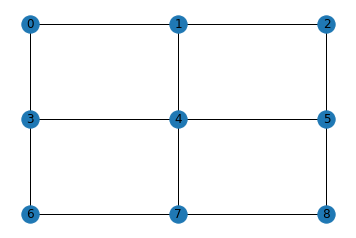

In [5]:
plt.axis('off')
#pos = nx.random_layout(G)
pos = np.array([[-1, 1], [0, 1], [1, 1], 
                [-1, 0], [0, 0], [1, 0],
                [-1, -1],[0, -1],[1, -1]])
#print(pos)
nx.draw_networkx(G,pos)
plt.show()

In [6]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=10000, label='checkerboard')

In [7]:
sampleset.variables
sampleset.record

rec.array([([1, 0, 0, 0, 1, 0, 0, 0, 1], -3.,  758, 0.),
           ([1, 0, 1, 0, 1, 0, 1, 0, 1], -3., 5098, 0.),
           ([1, 0, 0, 0, 1, 0, 1, 0, 1], -3., 1722, 0.),
           ([1, 0, 1, 0, 1, 0, 0, 0, 1], -3., 2396, 0.),
           ([1, 0, 1, 0, 1, 0, 0, 0, 0], -2.,    1, 0.),
           ([0, 0, 0, 0, 1, 0, 0, 0, 1], -2.,    1, 0.),
           ([0, 0, 1, 0, 1, 0, 0, 0, 1], -2.,    4, 0.),
           ([0, 0, 1, 0, 1, 0, 1, 0, 1], -2.,    5, 0.),
           ([1, 0, 0, 0, 0, 0, 0, 0, 1], -2.,    3, 0.),
           ([1, 0, 0, 0, 1, 0, 1, 0, 0], -2.,    2, 0.),
           ([0, 0, 0, 0, 1, 0, 1, 0, 1], -2.,    4, 0.),
           ([1, 0, 1, 0, 0, 0, 0, 0, 1], -2.,    2, 0.),
           ([1, 0, 1, 0, 1, 0, 1, 0, 0], -2.,    1, 0.),
           ([1, 0, 1, 0, 0, 0, 1, 0, 1], -2.,    2, 0.),
           ([1, 0, 1, 0, 1, 0, 0, 1, 1], -1.,    1, 0.)],
          dtype=[('sample', 'i1', (9,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')])

In [8]:
res = np.zeros(len(sampleset.record)) 
s = 0

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    print(states)
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i])

r=sampleset.record.num_occurrences
idx=np.argmax(r)
print(idx,r)
solution=sampleset.record
#print(solution)

[1 0 0 0 1 0 0 0 1]
[1 0 1 0 1 0 1 0 1]
[1 0 0 0 1 0 1 0 1]
[1 0 1 0 1 0 0 0 1]
[1 0 1 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 1]
[0 0 1 0 1 0 0 0 1]
[0 0 1 0 1 0 1 0 1]
[1 0 0 0 0 0 0 0 1]
[1 0 0 0 1 0 1 0 0]
[0 0 0 0 1 0 1 0 1]
[1 0 1 0 0 0 0 0 1]
[1 0 1 0 1 0 1 0 0]
[1 0 1 0 0 0 1 0 1]
[1 0 1 0 1 0 0 1 1]
1 [ 758 5098 1722 2396    1    1    4    5    3    2    4    2    1    2
    1]


<Container object of 15 artists>

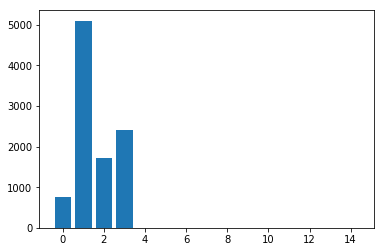

In [9]:
plt.bar(range(len(solution)),r)

In [34]:
dwave.inspector.show(sampleset)

KeyboardInterrupt: 